In [1]:
import gc
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
def generate_dataset(n_samples, n_features, noise=0.1):

    print('Generating dataset...')

    X, y, coef = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        noise=noise,
        coef=True,
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

    gc.collect()

    print('Dataset generated....')

    return X_train, y_train, X_test, y_test

In [3]:
def build_and_train_model(X_train, y_train, model):

    training_latenices = []

    for i in range(20):
        
        start_time = time.time()

        model.fit(X_train, y_train)

        training_latenices.append(time.time() - start_time)
    
    return training_latenices

In [4]:
X_train, y_train, X_test, y_test = generate_dataset(n_samples=10000, n_features=100)

Generating dataset...
Dataset generated....


In [5]:
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.8)
sgd_model = SGDRegressor(tol=1e-4,
                            penalty='elasticnet',
                            l1_ratio=0.25,
                            alpha=0.01)
sv_model = SVR(kernel='rbf', gamma='scale')
dt_model = DecisionTreeRegressor(max_depth=10)
rf_model = RandomForestRegressor(n_estimators=20)

In [6]:
training_latencies_dict = {}
model_dict = {
    'Linear Regression': linear_model,
    'Lasso Regression': lasso_model,
    'SGD Regression': sgd_model,
    'Support Vector Regression': sv_model,
    'Decision Tree Regression': dt_model,
    'Random Forest Regression': rf_model,
}
for model in model_dict:
    training_latencies_dict[model] = build_and_train_model(X_train, y_train, model_dict[model])

In [9]:
training_latencies_df = pd.DataFrame(training_latencies_dict)
training_latencies_df.head()

,Linear Regression,Lasso Regression,SGD Regression,Support Vector Regression,Decision Tree Regression,Random Forest Regression
0,0.032987,0.013854,0.068042,2.528559,0.593959,8.950748
1,0.026237,0.013630,0.067959,2.515527,0.624284,9.686201
2,0.023516,0.013438,0.068001,2.523121,0.621964,8.781390
3,0.020080,0.013985,0.067883,2.550472,0.664047,9.149338
4,0.021923,0.014001,0.069010,2.519270,0.611274,9.018746


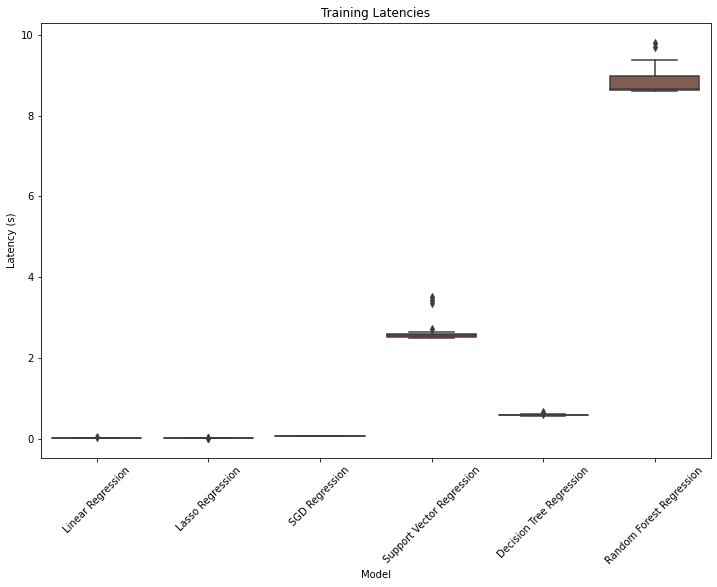

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=training_latencies_df)
plt.title('Training Latencies')
plt.xlabel('Model')
plt.ylabel('Latency (s)')
plt.xticks(rotation=45)
plt.show();